In [12]:
from aeon.datasets import (
    load_anomaly_detection,
    load_classification,
    load_forecasting,
    load_regression,
)

In [14]:
from aeon.datasets.tsc_datasets import univariate

dataset_list = univariate
print("Univariate All datasets= ", univariate)
print("Univariate length = ", len(univariate))

# selecting 10 minumum length datasets
dataset_lengths = {}  # name -> length

for dataset in dataset_list:
    # print(f'\nDataset name: {dataset}')

    X_train, y_train = load_classification(dataset, split="train", return_metadata=False)
    X_test, y_test = load_classification(dataset, split="test", return_metadata=False)
    # print('----------------------------------------------------')
    # print(f'X train length of {dataset}: {len(X_train)}')
    # print(f'Y train length of {dataset}: {len(y_train)}')
    # print(f'X test length of {dataset}: {len(X_test)}')
    # print(f'Y test length of {dataset}: {len(y_test)}')
    dataset_lengths[dataset] = len(X_train)


Univariate All datasets=  ['ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY', 'AllGestureWiimoteZ', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame', 'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'EOGHorizontalSignal', 'EOGVerticalSignal', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi', 'GestureMidAirD1', 'GestureMidAirD2', 'GestureMidAirD3', 'GesturePebbleZ1', 'GesturePebbleZ2', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain',

In [15]:
# sorting the datasets based on lengths
sorted_items = sorted(dataset_lengths.items(), key=lambda x: x[1])

minimum_20_dataset = []
for dataset_asc_sorted_name in sorted_items[:20]:
    minimum_20_dataset.append(dataset_asc_sorted_name[0])

print(minimum_20_dataset)

['DiatomSizeReduction', 'DodgerLoopGame', 'InsectEPGSmallTrain', 'DodgerLoopWeekend', 'Fungi', 'BeetleFly', 'BirdChicken', 'Chinatown', 'MoteStrain', 'Rock', 'ShapeletSim', 'SonyAIBORobotSurface1', 'ECGFiveDays', 'TwoLeadECG', 'FaceFour', 'Symbols', 'SonyAIBORobotSurface2', 'Coffee', 'FreezerSmallTrain', 'Beef']


In [16]:
#selecting 10 datasets that have smaller lengths
final_10_datasets=['DodgerLoopWeekend', 'BeetleFly', 'BirdChicken', 'Chinatown', 'MoteStrain', 'ShapeletSim', 
                   'SonyAIBORobotSurface1', 'ECGFiveDays', 'TwoLeadECG', 'SonyAIBORobotSurface2'
                  ]
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier

from aeon.datasets import load_classification
from sklearn.model_selection import cross_val_score
import warnings

knn_mean_accuracy_results = {}
# Optional: suppress warnings for cleaner output
warnings.filterwarnings("ignore")

for dataset_name in final_10_datasets:
    try:
        Dataset_X_train, Dataset_y_train = load_classification(dataset_name, split="train", return_metadata=False)
        Dataset_X_test, Dataset_y_test = load_classification(dataset_name, split="test", return_metadata=False)
    
        clf = KNeighborsTimeSeriesClassifier()
        scores = cross_val_score(clf, Dataset_X_train, Dataset_y_train, cv=10)
        print(f'Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: {dataset_name}, mean score: {scores.mean()}')
        knn_mean_accuracy_results[dataset_name]=scores.mean()
    except Exception as e:
        print(f'----------Exception for the dataset: {dataset_name}, error is: {e}--------')


Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: DodgerLoopWeekend, mean score: 1.0
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: BeetleFly, mean score: 0.85
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: BirdChicken, mean score: 0.8
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: Chinatown, mean score: 0.95
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: MoteStrain, mean score: 0.8
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: ShapeletSim, mean score: 0.5
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: SonyAIBORobotSurface1, mean score: 0.8
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: ECGFiveDays, mean score: 0.5666666666666667
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: TwoLeadECG, mean score: 0.9
Mean Accuracy KNeighborsTimeSeriesClassifier using dataset: SonyAIBORobotSurface2, mean score: 0.85


In [17]:
from aeon.classification.dictionary_based import BOSSEnsemble

from aeon.datasets import load_classification
from sklearn.model_selection import cross_val_score
import warnings

boss_mean_accuracy_results = {}
# Optional: suppress warnings for cleaner output
warnings.filterwarnings("ignore")

for dataset_name in final_10_datasets:
    try:
        X_train, y_train = load_classification(dataset_name, split="train", return_metadata=False)
        X_test, y_test = load_classification(dataset_name, split="test", return_metadata=False)
    

        clf = BOSSEnsemble()
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        print(f'Mean Accuracy BOSSEnsemble using dataset: {dataset_name}, mean score: {scores.mean()}')
        boss_mean_accuracy_results[dataset_name]=scores.mean()
    except Exception as e:
        print(f'-----Exception for the dataset: {dataset_name}, error is: {e}-----')

Mean Accuracy BOSSEnsemble using dataset: DodgerLoopWeekend, mean score: 1.0
Mean Accuracy BOSSEnsemble using dataset: BeetleFly, mean score: 1.0
Mean Accuracy BOSSEnsemble using dataset: BirdChicken, mean score: 1.0
Mean Accuracy BOSSEnsemble using dataset: Chinatown, mean score: 0.8
Mean Accuracy BOSSEnsemble using dataset: MoteStrain, mean score: 0.95
Mean Accuracy BOSSEnsemble using dataset: ShapeletSim, mean score: 1.0
Mean Accuracy BOSSEnsemble using dataset: SonyAIBORobotSurface1, mean score: 0.7
Mean Accuracy BOSSEnsemble using dataset: ECGFiveDays, mean score: 1.0
Mean Accuracy BOSSEnsemble using dataset: TwoLeadECG, mean score: 1.0
Mean Accuracy BOSSEnsemble using dataset: SonyAIBORobotSurface2, mean score: 0.8666666666666666


In [18]:
from aeon.classification.convolution_based import RocketClassifier

from aeon.datasets import load_classification
from sklearn.model_selection import cross_val_score
import warnings

rocket_mean_accuracy_results = {}
# Optional: suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# for dataset_name in small_10_dataset_lists:
for dataset_name in final_10_datasets:
    try:
        X_train, y_train = load_classification(dataset_name, split="train", return_metadata=False)
        X_test, y_test = load_classification(dataset_name, split="test", return_metadata=False)
    

        clf = RocketClassifier()
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        print(f'Mean Accuracy RocketClassifier using dataset: {dataset_name}, mean score: {scores.mean()}')
        rocket_mean_accuracy_results[dataset_name]=scores.mean()
    except Exception as e:
        print(f'-----Exception for the dataset: {dataset_name}, error is: {e}-----')

Mean Accuracy RocketClassifier using dataset: DodgerLoopWeekend, mean score: 1.0
Mean Accuracy RocketClassifier using dataset: BeetleFly, mean score: 0.75
Mean Accuracy RocketClassifier using dataset: BirdChicken, mean score: 0.85
Mean Accuracy RocketClassifier using dataset: Chinatown, mean score: 0.95
Mean Accuracy RocketClassifier using dataset: MoteStrain, mean score: 0.85
Mean Accuracy RocketClassifier using dataset: ShapeletSim, mean score: 1.0
Mean Accuracy RocketClassifier using dataset: SonyAIBORobotSurface1, mean score: 0.9
Mean Accuracy RocketClassifier using dataset: ECGFiveDays, mean score: 1.0
Mean Accuracy RocketClassifier using dataset: TwoLeadECG, mean score: 1.0
Mean Accuracy RocketClassifier using dataset: SonyAIBORobotSurface2, mean score: 0.8833333333333332


In [19]:
from aeon.classification.feature_based import TSFreshClassifier

from aeon.datasets import load_classification
from sklearn.model_selection import cross_val_score
import warnings

tsf_mean_accuracy_results = {}
# Optional: suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# for dataset_name in small_10_dataset_lists:
for dataset_name in final_10_datasets:
    try:
        X_train, y_train = load_classification(dataset_name, split="train", return_metadata=False)
        X_test, y_test = load_classification(dataset_name, split="test", return_metadata=False)

        clf = TSFreshClassifier()
        scores = cross_val_score(clf, X_train, y_train, cv=10)
        print(f'Mean Accuracy TSFreshClassifier using dataset: {dataset_name}, mean score: {scores.mean()}')
        tsf_mean_accuracy_results[dataset_name]=scores.mean()
    except Exception as e:
        print(f'-----Exception for the dataset: {dataset_name}, error is: {e}-----')

Mean Accuracy TSFreshClassifier using dataset: DodgerLoopWeekend, mean score: 0.8
Mean Accuracy TSFreshClassifier using dataset: BeetleFly, mean score: 0.5
Mean Accuracy TSFreshClassifier using dataset: BirdChicken, mean score: 0.5
Mean Accuracy TSFreshClassifier using dataset: Chinatown, mean score: 0.8
Mean Accuracy TSFreshClassifier using dataset: MoteStrain, mean score: 0.5
Mean Accuracy TSFreshClassifier using dataset: ShapeletSim, mean score: 0.5
Mean Accuracy TSFreshClassifier using dataset: SonyAIBORobotSurface1, mean score: 0.75
Mean Accuracy TSFreshClassifier using dataset: ECGFiveDays, mean score: 1.0
Mean Accuracy TSFreshClassifier using dataset: TwoLeadECG, mean score: 0.5166666666666666
Mean Accuracy TSFreshClassifier using dataset: SonyAIBORobotSurface2, mean score: 0.6166666666666666


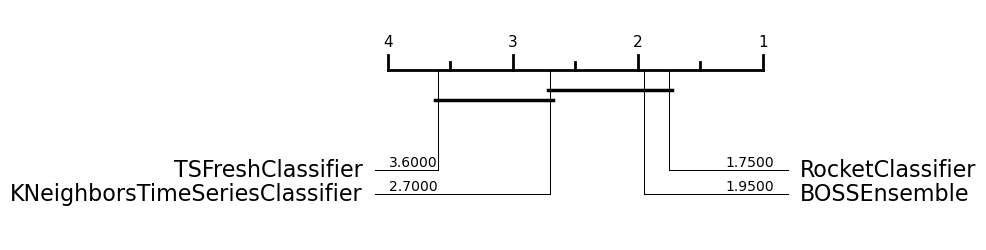

In [22]:
import numpy as np
classifiers = ["KNeighborsTimeSeriesClassifier", "BOSSEnsemble", "RocketClassifier", "TSFreshClassifier"]

classifier_accuracies=[]

for index in range(0, 10):
    dataset_row = []
    dataset_row.append(knn_mean_accuracy_results[final_10_datasets[index]])
    dataset_row.append(boss_mean_accuracy_results[final_10_datasets[index]])
    dataset_row.append(rocket_mean_accuracy_results[final_10_datasets[index]])
    dataset_row.append(tsf_mean_accuracy_results[final_10_datasets[index]])
    classifier_accuracies.append(dataset_row)

from aeon.visualisation import plot_critical_difference
_ = plot_critical_difference(classifier_accuracies, classifiers)

In [27]:
print("""
    Based on the above Critical Difference (CD) diagram, the performance of the TSFresh classifier is significantly worse than that of the other three classifiers: KNeighborsTimeSeries, BOSS (Bag-of-SFA-Symbols) Ensemble, and ROCKET. These classifiers represent different methodological categories:

1. KNeighborsTimeSeries is a distance-based classifier that typically relies on dynamic time warping or Euclidean distance.

2. BOSS is a dictionary-based approach that transforms time series into symbolic representations.

3. ROCKET (RandOm Convolutional KErnel Transform) is a convolution-based method that applies random convolutional kernels to extract features.

4. TSFresh is a feature-based classifier that computes a large set of time-series characteristics before applying a standard classifier.

All four classifiers were trained using 10-fold cross-validation on the following univariate time series datasets from the UCR/UEA archive: DodgerLoopWeekend, BeetleFly, BirdChicken, Chinatown, MoteStrain, ShapeletSim, SonyAIBORobotSurface1, ECGFiveDays, TwoLeadECG, and SonyAIBORobotSurface2.

Although ROCKET achieved the best overall performance, the difference between ROCKET and BOSS was not statistically significant, indicating that both methods perform comparably well on these datasets.
  """)


    Based on the above Critical Difference (CD) diagram, the performance of the TSFresh classifier is significantly worse than that of the other three classifiers: KNeighborsTimeSeries, BOSS (Bag-of-SFA-Symbols) Ensemble, and ROCKET. These classifiers represent different methodological categories:

1. KNeighborsTimeSeries is a distance-based classifier that typically relies on dynamic time warping or Euclidean distance.

2. BOSS is a dictionary-based approach that transforms time series into symbolic representations.

3. ROCKET (RandOm Convolutional KErnel Transform) is a convolution-based method that applies random convolutional kernels to extract features.

4. TSFresh is a feature-based classifier that computes a large set of time-series characteristics before applying a standard classifier.

All four classifiers were trained using 10-fold cross-validation on the following univariate time series datasets from the UCR/UEA archive: DodgerLoopWeekend, BeetleFly, BirdChicken, Chinatown,